In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
%matplotlib inline

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, optimizers

In [5]:
data = np.load("/content/gdrive/MyDrive/Colab Data/train-test-validate.npz")

In [35]:
x_train, y_train = data["x_train"], data["y_train"]
x_validate, y_validate = data["x_validate"], data["y_validate"]

x_train = x_train[..., np.newaxis]
x_validate = x_validate[..., np.newaxis]

N = 10000

x_train = x_train[:N, ...]
y_train = y_train[:N, ...]

x_validate = x_validate[:N, ...]
y_validate = y_validate[:N, ...]

In [36]:
print(x_train.shape, x_validate.shape)

(2296, 300, 300, 1) (574, 300, 300, 1)


In [42]:
model = keras.models.Sequential()

# Convolutional 1
model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), strides=4, input_shape=(300, 300, 1), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(layers.BatchNormalization())

# Convolutional 2
model.add(layers.ZeroPadding2D(padding=2))
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), strides=1, activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(layers.BatchNormalization())

# Convolutional 3
model.add(layers.ZeroPadding2D(padding=1))
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=1, activation="relu"))

# Convolutional 4
model.add(layers.ZeroPadding2D(padding=1))
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=1, activation="relu"))

# Convolutional 5
model.add(layers.ZeroPadding2D(padding=1))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=1, activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

model.add(layers.Flatten())

# Fully connected 1
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation="relu"))

# Fully connected 2
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation="relu"))

# Fully connected 3
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation="softmax"))

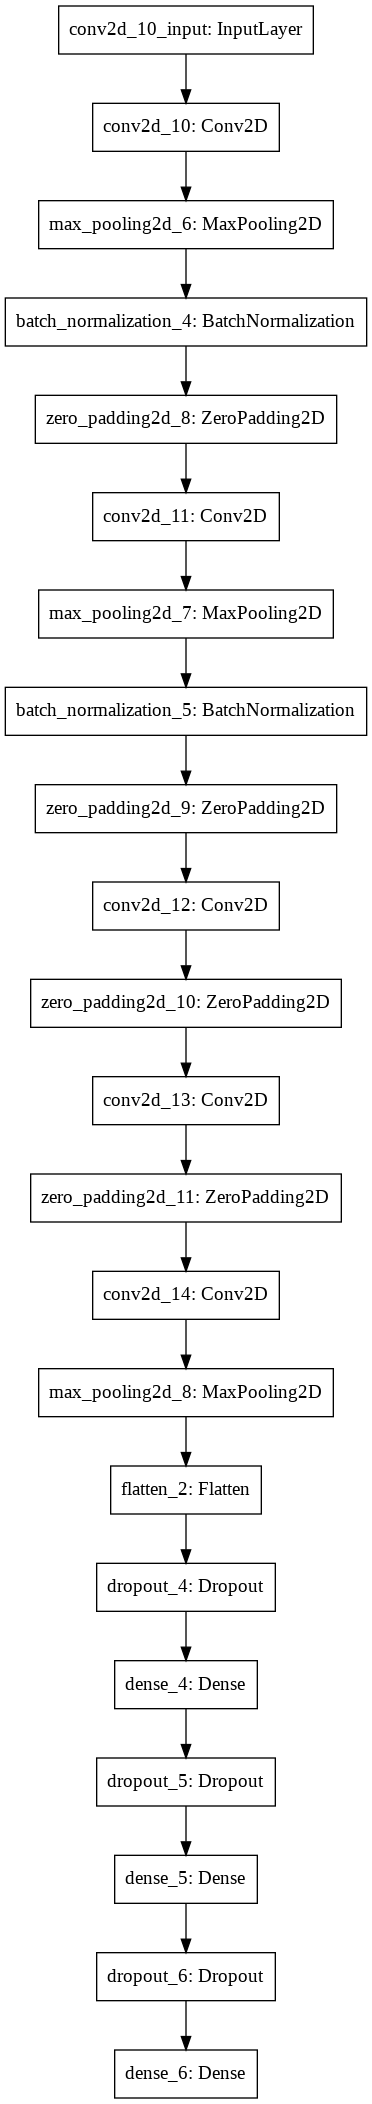

In [43]:
keras.utils.plot_model(model)

In [44]:
sgd = optimizers.SGD(learning_rate=0.1, momentum=0.5, decay=5e-4)

In [45]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [48]:
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_validate, y_validate))

Epoch 1/40
72/72 [==============================] - 5s 67ms/step - loss: 0.1537 - accuracy: 0.9473 - val_loss: 0.5991 - val_accuracy: 0.8275
Epoch 2/40
72/72 [==============================] - 5s 67ms/step - loss: 0.1415 - accuracy: 0.9473 - val_loss: 0.2478 - val_accuracy: 0.9233
Epoch 3/40
72/72 [==============================] - 5s 67ms/step - loss: 0.1190 - accuracy: 0.9599 - val_loss: 0.3975 - val_accuracy: 0.8624
Epoch 4/40
72/72 [==============================] - 5s 68ms/step - loss: 0.0911 - accuracy: 0.9739 - val_loss: 0.8984 - val_accuracy: 0.7683
Epoch 5/40
72/72 [==============================] - 5s 69ms/step - loss: 0.0950 - accuracy: 0.9678 - val_loss: 0.2970 - val_accuracy: 0.8990
Epoch 6/40
72/72 [==============================] - 5s 69ms/step - loss: 0.1457 - accuracy: 0.9525 - val_loss: 0.2343 - val_accuracy: 0.9390
Epoch 7/40
72/72 [==============================] - 5s 70ms/step - loss: 0.0724 - accuracy: 0.9769 - val_loss: 0.2340 - val_accuracy: 0.9233
Epoch 8/40
72

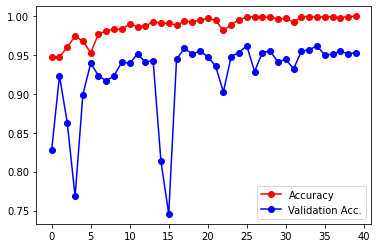

In [49]:
plt.plot(history.history["accuracy"], "ro-", label="Accuracy")
plt.plot(history.history["val_accuracy"], "bo-", label="Validation Acc.")
plt.legend();

In [50]:
classes = data["classes"]; classes

array(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
      dtype='<U16')

In [53]:
x_test = data["x_test"][..., np.newaxis]
y_test = data["y_test"]

In [54]:
y_pred = model.predict(x_test)

In [59]:
len(y_test), len(y_pred)

(394, 394)

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [68]:
def decode(ys):
  idx = np.argmax(ys, axis=1)
  return classes[idx]

y_test_labels = decode(y_test)
y_pred_labels = decode(y_pred)

In [69]:
cm = confusion_matrix(y_test_labels, y_pred_labels)

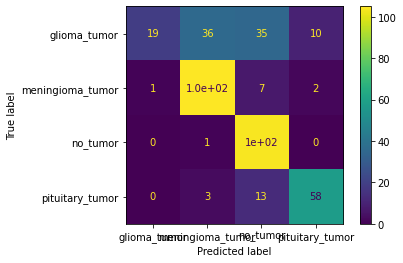

In [70]:
ConfusionMatrixDisplay(cm, display_labels=classes).plot()